In [1]:
import pandas, numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from time import time


print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

import fonctions_reboot

Automatically created module for IPython interactive environment


#first list guessed_types which are neither "supp" or "vide"

In [2]:
lines=open('files/codage_guessed_typeSSS.csv').readlines()# fichier rempli par irene 
gtlist=[]
for line  in lines[1:]:
    linev=line[:-1].split(';')
    if linev[4] != 'supp' and linev[3]!='Vide':
        gtlist.append(linev[0])
gtlist.remove('EaimePage')
gtlist.append('ACommE')
print len(gtlist)
gtlist.remove('EgoCouple')
gtlist.remove('EpartPage')
gtlist.remove('EpartGroupe')

58


In [3]:
gtlist

['AidentEPhoto',
 'ALienSecE',
 'ALienTexteE',
 'APhotoSecheE',
 'APhotoTexteE',
 'AStatutE',
 'EagitGroupe',
 'EaimeLienWebE',
 'EgoChangePP',
 'EgoCommLienAlterAlter',
 'EgoCommLienAlterEgo',
 'EgoCommLienEgoAlter',
 'EgoCommLienEgoEgo',
 'EgoCommPhotoAlterAlter',
 'EgoCommPhotoEgoAlter',
 'EgoCommPhotoEgoEgo',
 'EgoCommPubAlterAlter',
 'EgoCommPubAlterEgo',
 'EgoCommPubAlterPage',
 'EgoCommPubEgoAlter',
 'EgoCommPubEgoEgo',
 'EgoCommPubEgoPage',
 'EgoCommStatutAlterAlter',
 'EgoCommStatutEgoEgo',
 'ELienChezAlter',
 'ELienSecAlter',
 'ELienSecEgo',
 'ELienSecMention',
 'ELienTexteAlter',
 'ELienTexteEgo',
 'ELienTexteMention',
 'EpartArticle',
 'EpartEvtTexte',
 'EpartLienA',
 'EpartLienWeb',
 'EpartPhoto',
 'EpartPhotoTexte',
 'EpartPublication',
 'EpartStatutSec',
 'EPhotoChezAlter',
 'EPhotoSecheAlter',
 'EPhotoSecheE',
 'EPhotoSecheEMention',
 'EPhotoSecheIdent',
 'EPhotoTexteAlter',
 'EPhotoTexteE',
 'EPhotoTexteEMention',
 'EStatutAlter',
 'EStatutChezAlter',
 'EStatutEgo',
 '

start with E	Ego ->	
Start with A	Alter -> Ego	
Photo somewhere	Photo	
Lien somewhere	Link	
Pub somewhere	Pub	
aime somewhere	Like	
Part somewhere	Share	
tweet somewhere	tweet	
End with Groupe	-> groupe	
End with A	-> alter	
App/Jeux	Play	Ego->Ego

In [4]:
codage={}
codage_objet={}
codage_action={}
codage_from={}
codage_to={}
for gt in gtlist:
    if gt[0]=='E':
        codage_from.setdefault(gt,[]).append('E ->')
    if gt[0]=='A':
        codage_from.setdefault(gt,[]).append('A ->')
   
        
        
    if gt[-len('Groupe'):]=='Groupe':
        if gt=='EpartGroupe':
            codage_to.setdefault(gt,[]).append('-> E')
        else:
            codage_to.setdefault(gt,[]).append('-> G')
    elif gt[-len('Alter'):]=='Alter':
        if 'Comm' in gt:
            codage_to.setdefault(gt,[]).append('-> A')
        else:
            if 'Chez' in gt:
                codage_to.setdefault(gt,[]).append('-> A')
            else:
                codage_to.setdefault(gt,[]).append('-> G')
    elif gt[-1]=='A':
        if gt=='EpartLienA':
            codage_to.setdefault(gt,[]).append('-> E')
        else:
            codage_to.setdefault(gt,[]).append('-> A')
    else:
        if 'Comm' in gt and gt[-len('Page'):]=='Page':
            codage_to.setdefault(gt,[]).append('-> G')#cas particulier qui fait du groupe
        else:
            codage_to.setdefault(gt,[]).append('-> E')
        
        
    if 'Comm' in gt:
        codage_action.setdefault(gt,[]).append('Comm')
    elif 'Aime' in gt or 'aime' in gt:
        codage_action.setdefault(gt,[]).append('Share')
    elif 'Part' in gt or 'part' in gt:
        codage_action.setdefault(gt,[]).append('Share')
    elif 'tweet' in gt:
        codage_action.setdefault(gt,[]).append('Pub')
    elif 'App/Jeux' in gt:
        codage_action.setdefault(gt,[]).append('Play')
    else:
        codage_action.setdefault(gt,[]).append('Pub')
        
    if 'Photo' in gt or 'PP' in gt:
        codage_objet.setdefault(gt,[]).append('Photo')
    if 'Video' in gt:
        codage_objet.setdefault(gt,[]).append('Photo')
    if 'Lien' in gt:
        codage_objet.setdefault(gt,[]).append('Link')
    if 'Text' in gt and not gt in codage_objet:
        codage_objet.setdefault(gt,[]).append('Text')

    if not gt in codage_objet:
        codage_objet.setdefault(gt,[]).append('Text')




#code each guessed_type in a 4 dimensional system according to status  origin, destination, object, or type of action

In [5]:
objects,fromwhom,whomto,actions={},{},{},{}
for gt,type in  codage_from.iteritems():
    print gt,codage_from[gt],codage_to[gt],codage_objet.get(gt,''),codage_action.get(gt,'')
    for x in codage_from[gt]:
        fromwhom.setdefault(x,[]).append(gt)
    for x in codage_to[gt]:
        whomto.setdefault(x,[]).append(gt)
    for x in codage_objet[gt]:
        objects.setdefault(x,[]).append(gt)
    for x in codage_action[gt]:
        actions.setdefault(x,[]).append(gt)



EgoCommPhotoEgoAlter ['E ->'] ['-> A'] ['Photo'] ['Comm']
EagitGroupe ['E ->'] ['-> G'] ['Text'] ['Pub']
EgoCommStatutAlterAlter ['E ->'] ['-> A'] ['Text'] ['Comm']
AidentEPhoto ['A ->'] ['-> E'] ['Photo'] ['Pub']
EgoChangePP ['E ->'] ['-> E'] ['Photo'] ['Pub']
ELienTexteMention ['E ->'] ['-> E'] ['Link'] ['Pub']
EgoCommStatutEgoEgo ['E ->'] ['-> E'] ['Text'] ['Comm']
EPhotoTexteE ['E ->'] ['-> E'] ['Photo'] ['Pub']
EgoCommPubAlterEgo ['E ->'] ['-> E'] ['Text'] ['Comm']
ELienSecAlter ['E ->'] ['-> G'] ['Link'] ['Pub']
EgoCommPubEgoPage ['E ->'] ['-> G'] ['Text'] ['Comm']
EgoCommPubAlterAlter ['E ->'] ['-> A'] ['Text'] ['Comm']
EaimeLienWebE ['E ->'] ['-> E'] ['Link'] ['Share']
EpartPublication ['E ->'] ['-> E'] ['Text'] ['Share']
EgoCommPhotoEgoEgo ['E ->'] ['-> E'] ['Photo'] ['Comm']
EgoCommPubEgoEgo ['E ->'] ['-> E'] ['Text'] ['Comm']
EPhotoSecheE ['E ->'] ['-> E'] ['Photo'] ['Pub']
ELienSecMention ['E ->'] ['-> E'] ['Link'] ['Pub']
ELienTexteAlter ['E ->'] ['-> G'] ['Link'] ['Pub']


In [6]:
gtAComm = set(fromwhom['E ->']) & set(actions['Pub'])
print gtAComm

set(['EagitGroupe', 'EgoChangePP', 'EStatutEgo', 'EPhotoTexteE', 'ELienSecAlter', 'EVideoSecheAlter', 'EPhotoSecheAlter', 'EPhotoSecheE', 'ELienSecMention', 'ELienTexteAlter', 'EStatutChezAlter', 'EPhotoSecheEMention', 'EPhotoSecheIdent', 'ELienChezAlter', 'EPhotoTexteEMention', 'ELienTexteEgo', 'EVideoSecheE', 'EStatutEMention', 'EPhotoChezAlter', 'ELienTexteMention', 'EPhotoTexteAlter', 'Etweet', 'ELienSecEgo', 'EStatutAlter'])


In [7]:
print "fromwhom",fromwhom
print '\n'
print "whomto",whomto
print '\n'
print "actions",actions
print '\n'
print "objects",objects

fromwhom {'E ->': ['EgoCommPhotoEgoAlter', 'EagitGroupe', 'EgoCommStatutAlterAlter', 'EgoChangePP', 'ELienTexteMention', 'EgoCommStatutEgoEgo', 'EPhotoTexteE', 'EgoCommPubAlterEgo', 'ELienSecAlter', 'EgoCommPubEgoPage', 'EgoCommPubAlterAlter', 'EaimeLienWebE', 'EpartPublication', 'EgoCommPhotoEgoEgo', 'EgoCommPubEgoEgo', 'EPhotoSecheE', 'ELienSecMention', 'ELienTexteAlter', 'EpartPhotoTexte', 'EStatutChezAlter', 'EPhotoSecheEMention', 'EPhotoSecheIdent', 'ELienChezAlter', 'EpartPhoto', 'EPhotoTexteEMention', 'EgoCommLienAlterEgo', 'EgoCommLienEgoEgo', 'EpartArticle', 'EpartLienA', 'EPhotoSecheAlter', 'EpartStatutSec', 'ELienTexteEgo', 'EpartEvtTexte', 'EVideoSecheE', 'EStatutEMention', 'EgoCommPubAlterPage', 'EStatutEgo', 'EPhotoChezAlter', 'EgoCommPubEgoAlter', 'EpartLienWeb', 'EgoCommPhotoAlterAlter', 'EgoCommLienAlterAlter', 'EPhotoTexteAlter', 'Etweet', 'ELienSecEgo', 'EVideoSecheAlter', 'EStatutAlter', 'EgoCommLienEgoAlter'], 'A ->': ['AidentEPhoto', 'ALienSecE', 'ACommE', 'AStatu

In [8]:
peag={}
for fro, gtfro in fromwhom.iteritems():
    for whom,gtwhomto in whomto.iteritems():
        shared=list(set(gtwhomto) & set(gtfro))
        if len(shared)>0:
            if fro + whom[2:] !='A -> E':
                peag[fro + whom[2:]]=[x for x in shared if x in actions['Pub']]#on en garde que les gt qui sont des publications
            else:
                peag[fro + whom[2:]]=shared
print peag

{'E -> A': ['EStatutChezAlter', 'ELienChezAlter', 'EPhotoChezAlter'], 'A -> E': ['APhotoTexteE', 'ACommE', 'AidentEPhoto', 'ALienSecE', 'APhotoSecheE', 'ALienTexteE', 'AStatutE'], 'E -> E': ['EgoChangePP', 'EStatutEgo', 'EPhotoTexteE', 'EPhotoSecheE', 'ELienSecMention', 'EPhotoSecheEMention', 'EPhotoSecheIdent', 'EPhotoTexteEMention', 'ELienTexteEgo', 'EVideoSecheE', 'EStatutEMention', 'ELienTexteMention', 'Etweet', 'ELienSecEgo'], 'E -> G': ['EPhotoSecheAlter', 'EagitGroupe', 'ELienTexteAlter', 'EStatutAlter', 'EPhotoTexteAlter', 'ELienSecAlter', 'EVideoSecheAlter']}


In [9]:
#actions est limité aux seuls statuts de ego
actions_fromego={}
for type_action, gtlistaction in actions.iteritems():
    actions_fromego[type_action+'_A']=list(set(gtlistaction) & set(fromwhom['A ->']))
actions_A=actions_fromego
actions_fromego={}



for type_action, gtlistaction in actions.iteritems():
    actions_fromego[type_action]=list(set(gtlistaction) & set(fromwhom['E ->']))
actions=actions_fromego

print actions
print actions_A

{'Comm': ['EgoCommPhotoEgoAlter', 'EgoCommPhotoEgoEgo', 'EgoCommPubEgoEgo', 'EgoCommPubEgoAlter', 'EgoCommPhotoAlterAlter', 'EgoCommStatutAlterAlter', 'EgoCommLienAlterAlter', 'EgoCommLienEgoEgo', 'EgoCommLienAlterEgo', 'EgoCommStatutEgoEgo', 'EgoCommLienEgoAlter', 'EgoCommPubAlterPage', 'EgoCommPubEgoPage', 'EgoCommPubAlterAlter', 'EgoCommPubAlterEgo'], 'Share': ['EpartPublication', 'EpartArticle', 'EpartLienA', 'EpartPhotoTexte', 'EpartStatutSec', 'EpartPhoto', 'EpartEvtTexte', 'EpartLienWeb', 'EaimeLienWebE'], 'Pub': ['EagitGroupe', 'EgoChangePP', 'EStatutEgo', 'EPhotoTexteE', 'ELienSecAlter', 'EVideoSecheAlter', 'EPhotoSecheAlter', 'EPhotoSecheE', 'ELienSecMention', 'ELienTexteAlter', 'EStatutChezAlter', 'EPhotoSecheEMention', 'EPhotoSecheIdent', 'ELienChezAlter', 'EPhotoTexteEMention', 'ELienTexteEgo', 'EVideoSecheE', 'EStatutEMention', 'EPhotoChezAlter', 'ELienTexteMention', 'EPhotoTexteAlter', 'Etweet', 'ELienSecEgo', 'EStatutAlter']}
{'Share_A': [], 'Pub_A': ['APhotoTexteE', 'A

#aggregate guessed types to build 4 new families of indicators

In [10]:
df_gt=pandas.read_csv('files/rawdatagt.csv',sep=",",encoding="utf8",index_col=0)

for dim in list(df_gt.columns.values):
    if not dim in gtlist:
        del df_gt[dim]
df_gt.head()


,ALienSecE,ALienTexteE,APhotoSecheE,APhotoTexteE,AStatutE,AidentEPhoto,ELienChezAlter,ELienSecAlter,ELienSecEgo,ELienSecMention,...,EgoCommStatutEgoEgo,EpartArticle,EpartEvtTexte,EpartLienA,EpartLienWeb,EpartPhoto,EpartPhotoTexte,EpartPublication,EpartStatutSec,Etweet
ego_id,,,,,,,,,,,,,,,,,,,,,
56738db039143426b104053db6845df9,0.015789,0.011404,0.000877,0.003509,0.277193,0.009649,0.053509,0.070175,0.005263,0.000000,...,0.014035,0.000000,0.000000,0.000877,0.071930,0.009649,0.006140,0.0,0.000877,0.0
f284ae75c15d8a782176d4a51e188bd6,0.001560,0.009360,0.000000,0.003120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021841,0.000000,0.000000,0.0,0.000000,0.0
e6796d23ba82b2585213acd6a77b6d0f,0.000631,0.000000,0.000631,0.001894,0.075126,0.007576,0.029672,0.000631,0.012626,0.000000,...,0.015783,0.000631,0.001263,0.000000,0.022727,0.026515,0.004419,0.0,0.000000,0.0
7b789aa9b6165b08d42d54d448c14dcf,0.000000,0.000000,0.022088,0.000000,0.192771,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
e001adbe6445227cbec9bc528e5e02ac,0.004459,0.007804,0.002230,0.005574,0.088071,0.035674,0.001115,0.000000,0.000000,0.001115,...,0.002230,0.000000,0.000000,0.000000,0.004459,0.000000,0.000000,0.0,0.000000,0.0


In [11]:
print len(df_gt)

15173


In [12]:
df_AcommE=pandas.read_csv('files/rawdataAltercomm.csv',sep=",",encoding="utf8",index_col=0)

df_AcommE.head()



,ACommE
ego_id,
56738db039143426b104053db6845df9,1.371053
f284ae75c15d8a782176d4a51e188bd6,0.131045
e6796d23ba82b2585213acd6a77b6d0f,0.216540
7b789aa9b6165b08d42d54d448c14dcf,0.206827
e001adbe6445227cbec9bc528e5e02ac,0.275362


In [13]:
df_gt = pandas.concat([df_gt, df_AcommE], axis=1, join_axes=[df_gt.index])



In [14]:
print len(df_gt)

15173


In [15]:
print df_gt.mean().sum()
df_gt.mean()

1.87669963317


ALienSecE                  0.007266
ALienTexteE                0.016310
APhotoSecheE               0.005740
APhotoTexteE               0.010233
AStatutE                   0.147192
AidentEPhoto               0.019612
ELienChezAlter             0.032429
ELienSecAlter              0.004539
ELienSecEgo                0.023098
ELienSecMention            0.000359
ELienTexteAlter            0.009139
ELienTexteEgo              0.103246
ELienTexteMention          0.008340
EPhotoChezAlter            0.003993
EPhotoSecheAlter           0.004667
EPhotoSecheE               0.029001
EPhotoSecheEMention        0.001111
EPhotoSecheIdent           0.000361
EPhotoTexteAlter           0.009776
EPhotoTexteE               0.032350
EPhotoTexteEMention        0.004294
EStatutAlter               0.020150
EStatutChezAlter           0.122442
EStatutEMention            0.009508
EStatutEgo                 0.155883
EVideoSecheAlter           0.000003
EVideoSecheE               0.000243
EagitGroupe                0

In [16]:
df_gt.head()

,ALienSecE,ALienTexteE,APhotoSecheE,APhotoTexteE,AStatutE,AidentEPhoto,ELienChezAlter,ELienSecAlter,ELienSecEgo,ELienSecMention,...,EpartArticle,EpartEvtTexte,EpartLienA,EpartLienWeb,EpartPhoto,EpartPhotoTexte,EpartPublication,EpartStatutSec,Etweet,ACommE
ego_id,,,,,,,,,,,,,,,,,,,,,
56738db039143426b104053db6845df9,0.015789,0.011404,0.000877,0.003509,0.277193,0.009649,0.053509,0.070175,0.005263,0.000000,...,0.000000,0.000000,0.000877,0.071930,0.009649,0.006140,0.0,0.000877,0.0,1.371053
f284ae75c15d8a782176d4a51e188bd6,0.001560,0.009360,0.000000,0.003120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021841,0.000000,0.000000,0.0,0.000000,0.0,0.131045
e6796d23ba82b2585213acd6a77b6d0f,0.000631,0.000000,0.000631,0.001894,0.075126,0.007576,0.029672,0.000631,0.012626,0.000000,...,0.000631,0.001263,0.000000,0.022727,0.026515,0.004419,0.0,0.000000,0.0,0.216540
7b789aa9b6165b08d42d54d448c14dcf,0.000000,0.000000,0.022088,0.000000,0.192771,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.206827
e001adbe6445227cbec9bc528e5e02ac,0.004459,0.007804,0.002230,0.005574,0.088071,0.035674,0.001115,0.000000,0.000000,0.001115,...,0.000000,0.000000,0.000000,0.004459,0.000000,0.000000,0.0,0.000000,0.0,0.275362


In [17]:
del actions_A['Share_A']

In [18]:
#objects,fromwhom,whomto,actions
df_global=df_gt.copy()


df_global['activity_total'] = df_global.sum(axis=1)
for action,gtlist in actions.iteritems():
    temp=df_global[gtlist[0]].copy()
    if len(gtlist)>1:
        for gt in gtlist[1:]:
            temp+=df_global[gt]
    df_global['action_'+action]=temp

for action,gtlist in actions_A.iteritems():
    temp=df_global[gtlist[0]].copy()
    if len(gtlist)>1:
        for gt in gtlist[1:]:
            temp+=df_global[gt]
    df_global['action_A_'+action]=temp


    
for fromw,gtlist in peag.iteritems():
    temp=df_global[gtlist[0]].copy()
    for gt in gtlist[1:]:
        temp+=df_global[gt]
    df_global['peag_'+fromw]=temp


for obj,gtlist in objects.iteritems():
    temp=df_global[gtlist[0]].copy()
    for gt in gtlist[1:]:
        temp+=df_global[gt]
    df_global['object_'+obj]=temp
    
for dim in df_global:
    if '_' in dim or 'Fb_friends_count' in dim:
        pass
    else:
        del df_global[dim]

In [19]:
df_global.head()

,activity_total,action_Comm,action_Share,action_Pub,action_A_Pub_A,action_A_Comm_A,peag_E -> A,peag_A -> E,peag_E -> E,peag_E -> G,object_Photo,object_Link,object_Text
ego_id,,,,,,,,,,,,,
56738db039143426b104053db6845df9,4.417544,1.267544,0.089474,1.371053,0.318421,1.371053,0.655263,1.689474,0.480702,0.235088,0.280702,0.814912,3.321930
f284ae75c15d8a782176d4a51e188bd6,0.297972,0.000000,0.021841,0.131045,0.014041,0.131045,0.000000,0.145086,0.131045,0.000000,0.009360,0.156006,0.132605
e6796d23ba82b2585213acd6a77b6d0f,0.732955,0.157828,0.056187,0.216540,0.085859,0.216540,0.082702,0.302399,0.121212,0.012626,0.095960,0.114899,0.522096
7b789aa9b6165b08d42d54d448c14dcf,0.624498,0.000000,0.000000,0.202811,0.214859,0.206827,0.000000,0.421687,0.202811,0.000000,0.054217,0.000000,0.570281
e001adbe6445227cbec9bc528e5e02ac,0.957637,0.257525,0.005574,0.275362,0.143813,0.275362,0.248606,0.419175,0.016722,0.010033,0.082497,0.039019,0.836120


#normalize scores by total activity

In [20]:

df_global['activity_action']=df_global['action_Share']+df_global['action_Comm']+df_global['action_Pub']
df_global['activity_action_A']=df_global['action_A_Comm_A']+df_global['action_A_Pub_A']

df_global['fromE']=df_global['peag_E -> A']+df_global['peag_E -> E']+df_global['peag_E -> G']



In [21]:
df_global.head()

,activity_total,action_Comm,action_Share,action_Pub,action_A_Pub_A,action_A_Comm_A,peag_E -> A,peag_A -> E,peag_E -> E,peag_E -> G,object_Photo,object_Link,object_Text,activity_action,activity_action_A,fromE
ego_id,,,,,,,,,,,,,,,,
56738db039143426b104053db6845df9,4.417544,1.267544,0.089474,1.371053,0.318421,1.371053,0.655263,1.689474,0.480702,0.235088,0.280702,0.814912,3.321930,2.728070,1.689474,1.371053
f284ae75c15d8a782176d4a51e188bd6,0.297972,0.000000,0.021841,0.131045,0.014041,0.131045,0.000000,0.145086,0.131045,0.000000,0.009360,0.156006,0.132605,0.152886,0.145086,0.131045
e6796d23ba82b2585213acd6a77b6d0f,0.732955,0.157828,0.056187,0.216540,0.085859,0.216540,0.082702,0.302399,0.121212,0.012626,0.095960,0.114899,0.522096,0.430556,0.302399,0.216540
7b789aa9b6165b08d42d54d448c14dcf,0.624498,0.000000,0.000000,0.202811,0.214859,0.206827,0.000000,0.421687,0.202811,0.000000,0.054217,0.000000,0.570281,0.202811,0.421687,0.202811
e001adbe6445227cbec9bc528e5e02ac,0.957637,0.257525,0.005574,0.275362,0.143813,0.275362,0.248606,0.419175,0.016722,0.010033,0.082497,0.039019,0.836120,0.538462,0.419175,0.275362


In [22]:
#on construit les ratios d'activité par action, from, to, et objets

for dim in list(df_global.columns.values):
    if 'A ->' in dim or 'object' in dim :
        df_global[dim]=df_global[dim]/df_global['activity_total']
    if  'action' in dim:
        if '_A' in dim:
            df_global[dim]=df_global[dim]/df_global['activity_action_A']
        else:
            df_global[dim]=df_global[dim]/df_global['activity_action']
        
for dim in list(df_global.columns.values):
    if 'E ->' in dim:
        df_global[dim]=df_global[dim]/df_global['fromE']
df_global['from_A ->']=df_global['peag_A -> E']
df_global['from_E ->']=1-df_global['from_A ->']
del df_global['peag_A -> E']
del df_global['fromE']


#hypothèse sans Share
#df_global['action']=df_global['action_Comm']+df_global['action_Pub']

#df_global['action_Comm']=df_global['action_Comm']/df_global['action']
#df_global['action_Pub']=df_global['action_Pub']/df_global['action']
#del df_global['action_Share']
#del df_global['action']



In [23]:
df_global.head()

,activity_total,action_Comm,action_Share,action_Pub,action_A_Pub_A,action_A_Comm_A,peag_E -> A,peag_E -> E,peag_E -> G,object_Photo,object_Link,object_Text,activity_action,activity_action_A,from_A ->,from_E ->
ego_id,,,,,,,,,,,,,,,,
56738db039143426b104053db6845df9,4.417544,0.464630,0.032797,0.502572,0.188474,0.811526,0.477927,0.350608,0.171465,0.063542,0.184472,0.751986,1.0,1.0,0.382446,0.617554
f284ae75c15d8a782176d4a51e188bd6,0.297972,0.000000,0.142857,0.857143,0.096774,0.903226,0.000000,1.000000,0.000000,0.031414,0.523560,0.445026,1.0,1.0,0.486911,0.513089
e6796d23ba82b2585213acd6a77b6d0f,0.732955,0.366569,0.130499,0.502933,0.283925,0.716075,0.381924,0.559767,0.058309,0.130922,0.156761,0.712317,1.0,1.0,0.412575,0.587425
7b789aa9b6165b08d42d54d448c14dcf,0.624498,0.000000,0.000000,1.000000,0.509524,0.490476,0.000000,1.000000,0.000000,0.086817,0.000000,0.913183,1.0,1.0,0.675241,0.324759
e001adbe6445227cbec9bc528e5e02ac,0.957637,0.478261,0.010352,0.511387,0.343085,0.656915,0.902834,0.060729,0.036437,0.086147,0.040745,0.873108,1.0,1.0,0.437718,0.562282


#add facebook friends count

In [24]:
fname="files/Algopol-egos-infos.csv"

df_stat = pandas.read_csv(fname,sep=";",encoding="utf8",usecols=['ego_id','Fb_friends_count'],index_col=0,na_values=['undetermined'])

df_global_friends = pandas.concat([df_global, df_stat], axis=1, join_axes=[df_global.index])
df_global_friends=df_global_friends[df_global_friends['Fb_friends_count']>=5]

df_global_friends.head()



,activity_total,action_Comm,action_Share,action_Pub,action_A_Pub_A,action_A_Comm_A,peag_E -> A,peag_E -> E,peag_E -> G,object_Photo,object_Link,object_Text,activity_action,activity_action_A,from_A ->,from_E ->,Fb_friends_count
ego_id,,,,,,,,,,,,,,,,,
56738db039143426b104053db6845df9,4.417544,0.464630,0.032797,0.502572,0.188474,0.811526,0.477927,0.350608,0.171465,0.063542,0.184472,0.751986,1.0,1.0,0.382446,0.617554,317.0
f284ae75c15d8a782176d4a51e188bd6,0.297972,0.000000,0.142857,0.857143,0.096774,0.903226,0.000000,1.000000,0.000000,0.031414,0.523560,0.445026,1.0,1.0,0.486911,0.513089,154.0
e6796d23ba82b2585213acd6a77b6d0f,0.732955,0.366569,0.130499,0.502933,0.283925,0.716075,0.381924,0.559767,0.058309,0.130922,0.156761,0.712317,1.0,1.0,0.412575,0.587425,292.0
7b789aa9b6165b08d42d54d448c14dcf,0.624498,0.000000,0.000000,1.000000,0.509524,0.490476,0.000000,1.000000,0.000000,0.086817,0.000000,0.913183,1.0,1.0,0.675241,0.324759,398.0
e001adbe6445227cbec9bc528e5e02ac,0.957637,0.478261,0.010352,0.511387,0.343085,0.656915,0.902834,0.060729,0.036437,0.086147,0.040745,0.873108,1.0,1.0,0.437718,0.562282,212.0


In [25]:
#add info about total activity rate and friends / use as the distribution is heterogeneous

In [26]:
df_global_friends['Fb_friends_count']=log(1+df_global_friends['Fb_friends_count'])
df_global_friends['activity_total']=log(1+df_global_friends['activity_total'])
del df_global_friends['activity_action']
del df_global_friends['activity_action_A']

del df_global_friends['Fb_friends_count']
del df_global_friends['object_Photo']
del df_global_friends['object_Link']
del df_global_friends['object_Text']
#del df_global_friends['action_Share']
del df_global_friends['action_A_Pub_A']
del df_global_friends['action_A_Comm_A']




#compute classes

In [27]:
#classification using simple Kmeans
n_digits=6
X=df_global_friends.as_matrix()
# normalize dataset for easier parameter selection
np.random.seed(0)

X = StandardScaler().fit_transform(X)
print X[0]
two_means = cluster.MiniBatchKMeans(init='k-means++', n_clusters=n_digits, n_init=100, max_no_improvement=10, verbose=0)

#two_means = cluster.MiniBatchKMeans(n_clusters=n_digits)
two_means.fit(X)
y_pred = two_means.predict(X)
        
print len(y_pred)
feed=open('files/classesnew.csv','w')
compte0=0
for x,y in zip(df_global_friends.index,y_pred):
    feed.write(x+';'+str(y)+'\n') 
    if y==0:
       compte0+=1
print compte0
feed.close()



[ 1.48037723  0.91233918 -0.52317307 -0.51708266  0.81561637 -1.06700066
  0.86628265 -0.7550634   0.7550634 ]
15145
2634


In [74]:
def sort_pd(key=None,reverse=False,cmp=None):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse,cmp=cmp)]
    return sorter
#custom_dict = {'1':0, '2':1, '3':3 , '4':4, '5':5, '0':2  }



{u'Egocentr\xe9': 3, 'Partageur': 5, 'Egovisible': 4, u'Conversation Distribu\xe9e': 2, u'Conversation de Groupe': 1, 'Non Actif': 0}


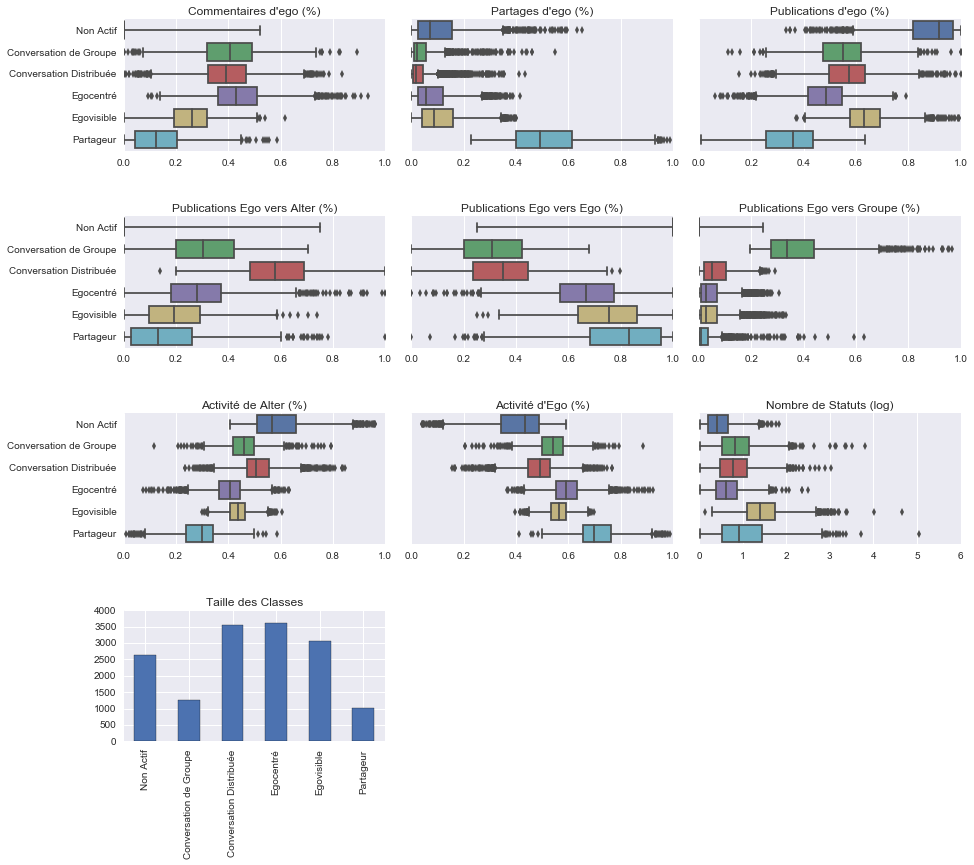

In [86]:

labelsdict={}
labelsdict[0] = u'Non Actif'
labelsdict[1] = u'Egovisible'
labelsdict[2] = u'Conversation Distribuée'
labelsdict[3] = u'Egocentré'
labelsdict[4] = u'Conversation de Groupe'
labelsdict[5] = u'Partageur'
order=['Non Actif', u'Conversation de Groupe', u'Conversation Distribuée',  u'Egocentré','Egovisible','Partageur']
labelsdict_inv={}
for i,x in enumerate(order):
    labelsdict_inv[x]=i
print labelsdict_inv

#action_Comm	action_Share	action_Pub	action_A_Pub_A	action_A_Comm_A	peag_E -> A	peag_E -> E	peag_E -> G
columnname={}
columnname['action_Comm']='Commentaires d\'ego (%)'
columnname['action_Share']='Partages d\'ego (%)'
columnname['action_Pub']='Publications d\'ego (%)'
columnname['peag_E -> A']=u'Publications Ego vers Alter (%)'
columnname['peag_E -> E']=u'Publications Ego vers Ego (%)'
columnname['peag_E -> G']=u'Publications Ego vers Groupe (%)'
columnname['from_A ->']=u'Activité de Alter (%)'
columnname['from_E ->']=u'Activité d\'Ego (%)'
columnname['activity_total']='Nombre de Statuts (log)'







import warnings
import seaborn as sb
warnings.filterwarnings("ignore")
def reporting(y_pred,df_norm,name):
    df_fff=df_norm.copy()
    try:
        del df_fff['classe']
    except:
        pass
    
    #df_fff.insert( 0,'classe',y_pred)
    df_fff.insert( 0,'classe',[labelsdict[x] for x in y_pred])

    #print the statististics of each class
    #print df_fff.groupby('classe').describe()

    
    fig = plt.figure(figsize=(15,10+len(df_norm.columns)))
    cols = n_digits
    rows=60
    j=-1
    colums=list(df_fff.columns)
    colums.remove('classe')
    colums.remove('activity_total')
    for column in colums+['activity_total','classe'] :#keydim[:]:
        j+=1
        ax = fig.add_subplot(rows/12+1, (cols+1)/2, j + 1)
        ax.set_title(columnname.get(column,column))
        if column=='classe':
            ag = df_fff.classe.value_counts()#.sort_index()
            sort_by_custom_dict = sort_pd(key=labelsdict_inv.get)
            #print ag.head(6)
            #print ag.index
            ag=ag.iloc[sort_by_custom_dict(ag.index)]
            #print ag.head(6)
            ag.plot(kind='bar',title ='Taille des Classes')#,x=order)#,order=['Non Actif', u'Conversation de Groupe', u'Conversation Distribuée',  u'Egocentré','Egovisible','Partageur'])#,color=colors+colors)

        else:
            sb.boxplot(df_fff[column],groupby=df_fff['classe'],vert=False,labels=None,order=order)
        if j%3!=0:
            if not column=='classe':
                ax.set_yticklabels('')
        ax.set_xlabel('')
        ax.set_ylabel('')


    plt.subplots_adjust(hspace=0.5, wspace=0.1)
    #plt.tight_layout()
    savefig('results/whiskers_'+str(n_digits)+'_'+name+'.pdf')
    savefig('results/whiskers_'+str(n_digits)+'_'+name+'.png')

#sb.boxplot(df[column],groupby=df[classe_dim],order=['Non Actif', 'Non Communiquant', u'Conversation de groupe', u'Conversation distribuée',  u'Egocentré','Egovisible'],vert=False)
reporting(y_pred,df_global_friends,'')




2 : conversation de groupe
1: conversation distribuée
0: égocentrée
5: partageur
4: inactif
3: egovisible


#plot pie charts

In [87]:
classefilename='files/classesnew.csv'
feed=open(classefilename)
dataclasse={}
data1,data2=[],[]
for x in feed.readlines():
    try:
        xv=x[:-1].split(';')
        dataclasse[xv[0]]=xv[1]
        data1.append(xv[0])
        data2.append(xv[1])
    except:
        print x
df_classe = pandas.DataFrame({"classe":data2},index=data1)
df_global_friends['classe']=df_classe['classe']
print df_global_friends.groupby('classe').describe()

              action_Comm   action_Pub  action_Share  activity_total  \
classe                                                                 
0      count  2634.000000  2634.000000   2634.000000     2634.000000   
       mean      0.014051     0.879462      0.106487        0.476841   
       std       0.053805     0.115401      0.107103        0.331395   
       min       0.000000     0.333333      0.000000        0.013684   
       25%       0.000000     0.817085      0.025775        0.212325   
       50%       0.000000     0.916763      0.072180        0.402595   
       75%       0.000000     0.969449      0.155838        0.675763   
       max       0.520000     1.000000      0.651282        1.837016   
1      count  3070.000000  3070.000000   3070.000000     3070.000000   
       mean      0.252196     0.636502      0.111302        1.454222   
       std       0.096441     0.088566      0.089825        0.497663   
       min       0.000000     0.369261      0.000000        0.14

In [93]:
datat80=df_global_friends.groupby('classe').mean()
datat80.head()
radius = list(datat80['activity_total'].values)
print radius
datat80.head()
#labelsdict[0] = u'Non Actif'
#labelsdict[1] = u'Egovisible'
#labelsdict[2] = u'Conversation Distribuée'
#labelsdict[3] = u'Egocentré'
#labelsdict[4] = u'Conversation de Groupe'
#labelsdict[5] = u'Partageur'~1000



[0.47684132101713478, 1.4542215943530381, 0.81788979254050287, 0.64927431729145324, 0.88082278044090923, 1.0681647862012227]


,activity_total,action_Comm,action_Share,action_Pub,peag_E -> A,peag_E -> E,peag_E -> G,from_A ->,from_E ->
classe,,,,,,,,,
0,0.476841,0.014051,0.106487,0.879462,0.011572,0.985604,0.002824,0.594831,0.405169
1,1.454222,0.252196,0.111302,0.636502,0.202510,0.748077,0.049413,0.437850,0.562150
2,0.817890,0.396728,0.035055,0.568217,0.594081,0.338477,0.067442,0.513333,0.486667
3,0.649274,0.438553,0.083424,0.478023,0.282347,0.668685,0.048967,0.404583,0.595417
4,0.880823,0.403988,0.049141,0.546871,0.309908,0.313180,0.376913,0.460179,0.539821


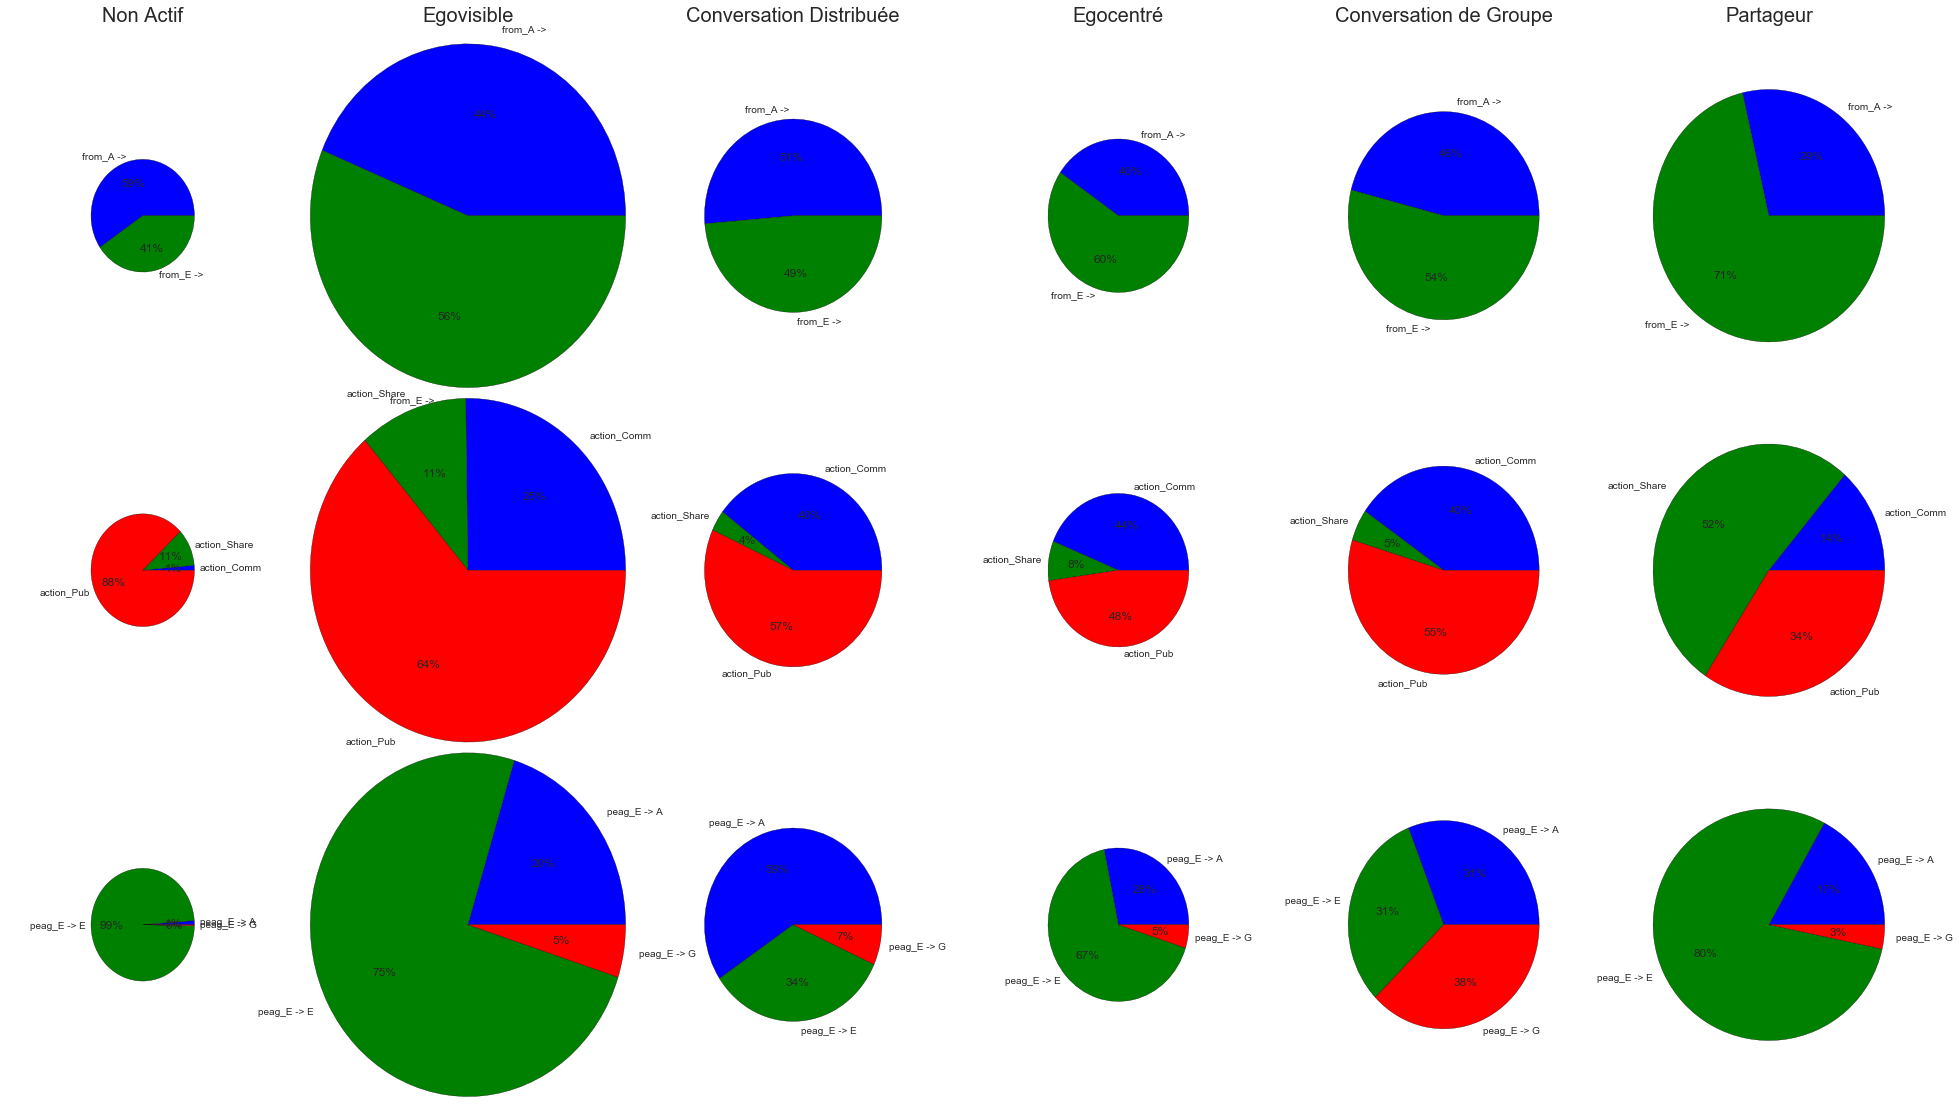

In [97]:
f, axarr = plt.subplots(3, 6,figsize=(34,18))
ax = plt.gca() # For each successive plot, change the max radius so that they overlay 
for i,category in enumerate(['from','action','peag']):
    datat80categ=datat80.copy()
    for dim in datat80categ:
        if not category in dim:
            del datat80categ[dim]
    for classe in datat80categ.index: 
        #print datat80categ.loc[classe,:]
        axarr[i,classe].pie(datat80categ.loc[classe,:],labels=list(datat80categ.columns.values), autopct='%1.f%%',radius=1.*radius[int(classe)])#, labeldistance=((2*(i+1)-1)/14.0)/((i+1)/7.0), colors=plt.style.library['bmh']['axes.color_cycle']) 
        if i ==0:
            axarr[i,classe].set_title(labelsdict[int(classe)], y=1.14, fontsize=20)

        #axarr[i,classe].legend(loc=(-5.77,-.28))#, shadow=True)
ax.set_aspect('equal')# - See more at: http://www.mzan.com/article/33019879-hierarchic-pie-donut-chart-from-pandas-dataframe-using-bokeh-or-matplotlib.shtml#sthash.9uzbj4pI.dpuf
plt.savefig('results/piecharts.png', dpi = 300,bbox_inches='tight')
plt.savefig('results/piecharts.pdf',bbox_inches='tight')



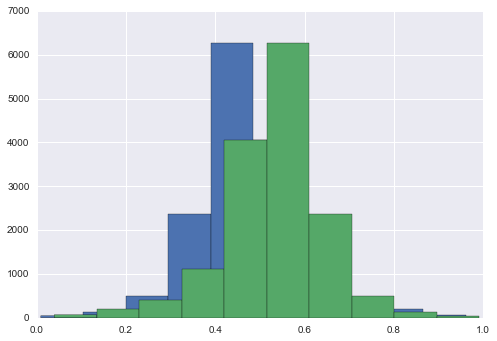

In [98]:
df_global_friends['from_A ->'].hist()
df_global_friends['from_E ->'].hist()

In [ ]:
df_global_friends['action_Comm'].hist()
df_global_friends['action_Share'].hist()
df_global_friends['action_Pub'].hist()

In [ ]:
df_global_friends['whomto_-> E'].hist()
df_global_friends['whomto_-> A'].hist()
df_global_friends['whomto_-> G'].hist()